# Lab 2.4

Goals:

* Generate random data using numpy.
* Generate histograms using matplotlib.
* Determine how the average of a sample of a random variable behaves.


### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


In this lab we're going to generate random data and display it.  First we'll need to import libraries.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

First you'll need a random variable to study.  Run the code cell below to define some PDFs, then pick a different one than other members of your group.  Be sure to read the comments below your choice.

In [31]:
def pdf1(x):
  return np.where((x >= 0) & (x <= 1) , x*(1-x)**4*30,0)
# pdf1 is the pdf of the beta(2,5) random variable
# create a size n sample of beta (2,5) with
# np.random.beta(2,5,n)

def pdf2(x):
  return np.where((x >= 3) & (x <= 6) , (2*x-6)/9,0)
# pdf2 is the pdf of the triangular(3,6,6) random variable
# create a size n sample of triangular(3,6,6) with
# np.random.triangular(3, 6, 6, n)


def pdf3(x):
  return np.where((x >= 1) & (x <= 6) , 0.2,0)
# pdf3 is the pdf of the uniform random variable on [1,6]
# create a size n sample of this variable with
# np.random.uniform(1,6,n)


def pdf4(x):
  return np.where((x > 0) & (x < 1) , 1/x**0.5/(1-x)**(0.5)/3.1415926,0)
# pdf4 is the pdf of the beta(0.5,0.5) random variable
# create a size n sample of beta(0.5,0.5) with
# np.random.beta(0.5,0.5,n)



def pdf5(x):
  return np.where((x >= 2) & (x < 4) , (4-x)/2,0)
# pdf5 is the pdf of the triangular(2,2,4) random variable
# create a size n sample of triangular(2,2,4) with
# np.random.triangular(2,2,4,n)



def pdf6(x):
    return np.where((x >= 0) & (x < 1) , 70*x**3/(1-x)**(0.5)/64,0)
# pdf6 is the pdf of the beta(4,0.5) random variable
# create a size n sample of beta(4,0.5) with
# np.random.beta(4,0.5,n)




---
Hao chooses PDF 5. My group worked on function 1 to 5.


## Q1

We saw in the pre-lab that a histogram of a sample from a normal random variable looks like the pdf of that variable.

* Make a nice graph that shows a properly sized and binned histogram of a sample from your random variable lines up with a plot of your PDF.  
 * You will need to pick your `x` values to line up with the outcomes of your random variable.
 * You will also have to resize (by multiplying) the PDF outputs to make your histogram and your plot the same height.
 * Make sure your graph has a title.

In [32]:
np.random.seed(20250728)

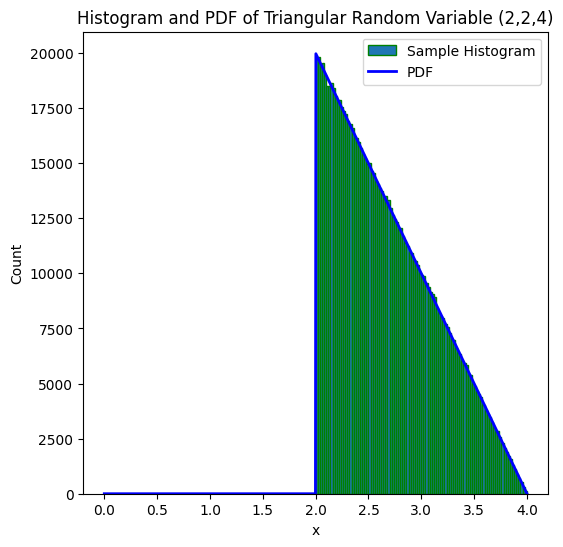

In [33]:
def pdf(x):
  return np.where((x >= 2) & (x < 4) , (4-x)/2,0)
# pdf5 is the pdf of the triangular(2,2,4) random variable


n = 1000000
sample = np.random.triangular(2,2,4,n)

#define x and y axises
x_val = np.linspace(0,4,1000)

y_val = pdf(x_val)

# generate plot
fig,ax = plt.subplots(figsize=(6,6))

# histogram
count,bins,_ = ax.hist(sample, bins=100, edgecolor='green', label= 'Sample Histogram')

# scale the PDF
scale_factor = len(sample) *(bins[1] - bins[0])
ax.plot(x_val,y_val * scale_factor, color = 'blue', linewidth = 2, label = 'PDF')

# add a title to the axis
ax.set_title('Histogram and PDF of Triangular Random Variable (2,2,4)', fontsize = 12)
ax.set_xlabel('x', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.legend(loc='upper right')

#show the current axis
plt.show()


## Q2
Recall that averaging samples of a random variable produces a new random variable.  We will see how that works with your random variable.
* Rewrite the `sampleaverage()` function from the prelab to create averages of samples from your random variable instead of a normal random variable.
* Use your new `sampleaverage()` function to make an array of 10000 averages of samples of your random variable with sample size
 * 1
 * 10
 * 100
 * and 1000
* Make histograms of each of these samples.  Include useful titles!  
* Explain how the shape of the histograms appears to be changing as the sample size increases from 1 to 1000.

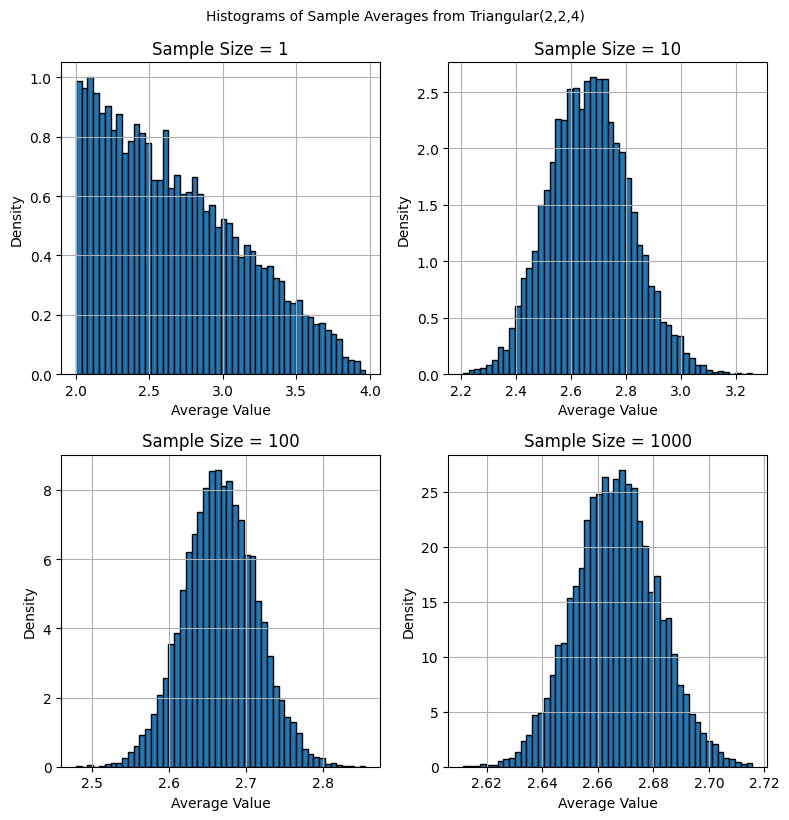

In [34]:
# rewrite the sample average function
def sampleaverage(samples=1, averages=1):
    averagesarray = np.array([])
    for i in range(averages):
        sample = np.random.triangular(2, 2, 4, size=samples)
        x = np.average(sample)
        averagesarray = np.append(averagesarray, x)
    return averagesarray

# generate average
avg_1 = sampleaverage(samples=1, averages=10000)
avg_10 = sampleaverage(samples=10, averages=10000)
avg_100 = sampleaverage(samples=100, averages=10000)
avg_1000 = sampleaverage(samples=1000, averages=10000)

# plot histograms
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].hist(avg_1, bins=50, edgecolor='black', density=True)
axs[0, 0].set_title('Sample Size = 1')

axs[0, 1].hist(avg_10, bins=50, edgecolor='black', density=True)
axs[0, 1].set_title('Sample Size = 10')

axs[1, 0].hist(avg_100, bins=50, edgecolor='black', density=True)
axs[1, 0].set_title('Sample Size = 100')

axs[1, 1].hist(avg_1000, bins=50, edgecolor='black', density=True)
axs[1, 1].set_title('Sample Size = 1000')

for ax in axs.flat:
    ax.set_xlabel('Average Value')
    ax.set_ylabel('Density')
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Histograms of Sample Averages from Triangular(2,2,4)', fontsize=10, y=1.02)
plt.show()


## Q3

When the sample size is large, the average is approximately a normal random variable. That's why your graphs started looking like bell curves.  But what are the parameters ($\mu$, $\sigma$) of these normal random variables?
* Make a nice histogram showing how last random variable in Q2 (sample size 1000) matches up to a normal PDF using `norm.pdf()`.  Make sure your graph has a title.

You'll have to do some trial and error with your $\mu$, $\sigma$ and height multiplier to make this work.

mu =  2.6666399454651684
sigma =  0.014963062402389113


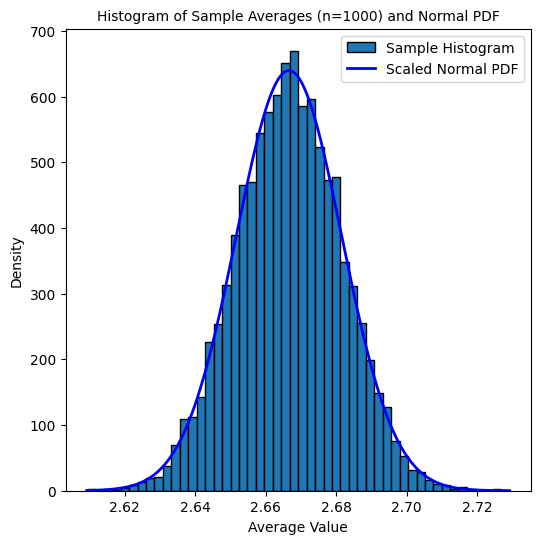

In [35]:
avg_1000 = sampleaverage(samples=1000, averages=10000)

# set mu and sigma
mu = avg_1000.mean()
sigma = avg_1000.std()
print('mu = ', mu)
print('sigma = ', sigma)

# create x valus of the PDF
x_val_pdf = np.linspace(min(avg_1000), max(avg_1000), 1000)

# create y values of the PDF
y_val_pdf = norm.pdf(x_val_pdf, loc = mu, scale = sigma)

# create plot
fig, ax = plt.subplots(figsize=(6, 6))

# plot histogram
count, bins, _ = ax.hist(avg_1000, bins=50, edgecolor='black', label='Sample Histogram')

# scale the PDF
scale_factor = len(avg_1000)  * (bins[1]-bins[0])
ax.plot(x_val_pdf, y_val_pdf * scale_factor, color='blue', linewidth=2, label='Scaled Normal PDF')

ax.set_title('Histogram of Sample Averages (n=1000) and Normal PDF', fontsize = 10)
ax.set_xlabel('Average Value', fontsize = 10)
ax.set_ylabel('Density', fontsize = 10)
ax.legend(loc='upper right')

plt.show()




## Q4

How does the number of samples in each average affect the parameters $\mu$ and $\sigma$?
* Increase the size of the samples you are averaging to 10000.  Make a nice histogram with a matching normal PDF and a title.
* In a text cell, explain how does the $\mu$ and $\sigma$ of this matching normal random variable compare to the $\mu$ and $\sigma$ from the sample size 1000 averages in Q3?



---
Question 1:


mu =  2.6666562870454635
sigma =  0.004652203612206217


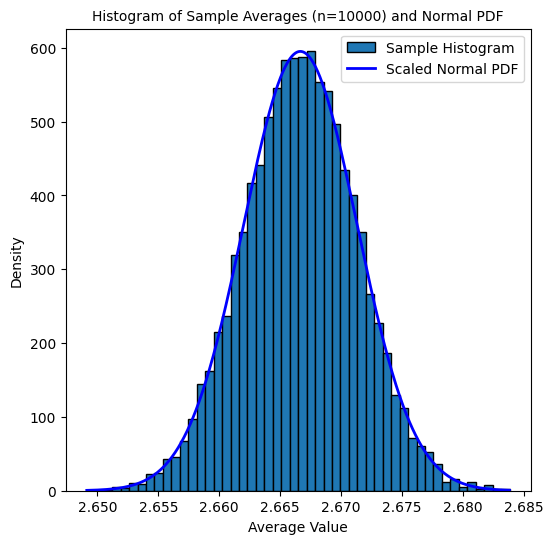

In [36]:
avg_10000 = sampleaverage(samples=10000, averages=10000)

# set mu and sigma
mu = avg_10000.mean()
sigma = avg_10000.std()
print('mu = ', mu)
print('sigma = ', sigma)

# create x valus of the PDF
x_val_pdf = np.linspace(min(avg_10000), max(avg_10000), 1000)

# create y values of the PDF
y_val_pdf = norm.pdf(x_val_pdf, loc = mu, scale = sigma)

# create plot
fig, ax = plt.subplots(figsize=(6, 6))

# plot histogram
count, bins, _ = ax.hist(avg_10000, bins=50, edgecolor='black', label='Sample Histogram')

# scale the PDF
scale_factor = len(avg_10000)  * (bins[1]-bins[0])
ax.plot(x_val_pdf, y_val_pdf * scale_factor, color='blue', linewidth=2, label='Scaled Normal PDF')

ax.set_title('Histogram of Sample Averages (n=10000) and Normal PDF', fontsize = 10)
ax.set_xlabel('Average Value', fontsize = 10)
ax.set_ylabel('Density', fontsize = 10)
ax.legend(loc='upper right')

plt.show()



Question 2:

* The $\mu$ from 1000 sample is 2.666652730083929. The $\mu$ from 10000 sample is 2.6666796107345423. They are almost the same. Though both $\mu$ are very close to the true mean, $\frac{2+2+4}{3} = 2.67$, the $\mu$ from 10000 sample is a bit closer.

* The $\sigma$ from 10000 sample is much smaller than the $\sigma$ from 1000 sample. The $\sigma$ from 1000 sample is 0.014946902213928295. The $\sigma$ from 10000 sample is 0.004696580058532698. As sample size increases, the distribution of the normal PDF is much tighter to the mean. Thus, the standard deviation is smaller.  

In [37]:
# estimate mu and sigma for both
mu_1000 = avg_1000.mean()
sigma_1000 = avg_1000.std()

mu_10000 = avg_10000.mean()
sigma_10000 = avg_10000.std()

print('mu_1000 = ', mu_1000)
print('mu_10000 = ', mu_10000)

print('sigma_1000 = ', sigma_1000)
print('sigma_10000 = ', sigma_10000)


mu_1000 =  2.6666399454651684
mu_10000 =  2.6666562870454635
sigma_1000 =  0.014963062402389113
sigma_10000 =  0.004652203612206217


To further test my results above and compare the differences, I put the sample 1000 graph and sample 10000 graph together.

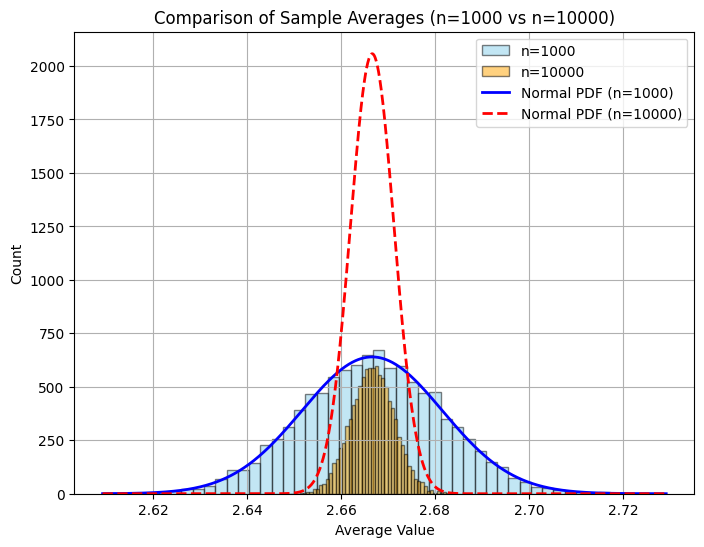

In [39]:
# create x-axis
xmin = min(avg_1000.min(), avg_10000.min())
xmax = max(avg_1000.max(), avg_10000.max())
x_val = np.linspace(xmin, xmax, 1000)

# compute PDF values
y_1000 = norm.pdf(x_val, loc=mu_1000, scale=sigma_1000)
y_10000 = norm.pdf(x_val, loc=mu_10000, scale=sigma_10000)

# create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# plot histograms
count1, bins1, _ = ax.hist(avg_1000, bins=50, alpha=0.5, edgecolor='black', label='n=1000', color='skyblue')
count2, bins2, _ = ax.hist(avg_10000, bins=50, alpha=0.5, edgecolor='black', label='n=10000', color='orange')

# scale PDFs seperately
bin_width = bins1[1] - bins1[0]
scale_factor_1000 = len(avg_1000) * bin_width
scale_factor_10000 = len(avg_10000) * bin_width

# plot scaled PDFs
ax.plot(x_val, y_1000 * scale_factor_1000, color='blue', linewidth=2, label='Normal PDF (n=1000)')
ax.plot(x_val, y_10000 * scale_factor_10000, color='red', linewidth=2, linestyle='--', label='Normal PDF (n=10000)')

# plot the graph
ax.set_title('Comparison of Sample Averages (n=1000 vs n=10000)', fontsize=12)
ax.set_xlabel('Average Value', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.legend(loc='upper right')
ax.grid(True)

plt.show()

## Q5

Other students in your group had different density functions than you.  They also obtained different values for $\mu$ and $\sigma$ in Q3.  Compare your data with theirs to answer the following questions in a text cell.
* What property of your density function appears to determine the value of $\mu$ in your distribution of averages?
* How do the shapes of different density functions appear to affect the size of $\sigma$? Reference their shapes and $\sigma$s specifically in your answer.
* Why do the relationships you observed make sense?

Be sure you compare averages of the same sample sizes. If you and your groupmates are using different sized samples, you won't be able to tell whether the differences you observe come from differences in your random variables, or from differences in what averages you're collecting.  


---

Question 1:

* My group worked on the first 5 PDFs.
* Please see the table below presenting the PDFs, shapes, and means.
* The center and the skewness in the density function determine the value of $\mu$. The center determines the location of the PDF. The skewness determines where the most observations locates.




In [40]:
# Mean
print("""
|PDF| Distribution       | Shape                          |   Mean   |
|---|--------------------|--------------------------------|----------|
| 1 | Beta(2,5)          | Right-skewed (from 0 to 1)     | 0.285714 |
| 2 | Triangular(3,6,6)  | Left-skewed (peak at 6)        | 5.000000 |
| 3 | Uniform(1,6)       | Flat                           | 3.500000 |
| 4 | Beta(0.5,0.5)      | U-shape (from 0 to 1)          | 0.500000 |
| 5 | Triangular(2,2,4)  | Right-skewed (peak at 2)       | 2.666667 |
""")


|PDF| Distribution       | Shape                          |   Mean   |
|---|--------------------|--------------------------------|----------|
| 1 | Beta(2,5)          | Right-skewed (from 0 to 1)     | 0.285714 |
| 2 | Triangular(3,6,6)  | Left-skewed (peak at 6)        | 5.000000 |
| 3 | Uniform(1,6)       | Flat                           | 3.500000 |
| 4 | Beta(0.5,0.5)      | U-shape (from 0 to 1)          | 0.500000 |
| 5 | Triangular(2,2,4)  | Right-skewed (peak at 2)       | 2.666667 |



Question 2:

*   Table below presents the shape and the standard deviation of the 5 PDFs when sample size is equal to 1000.
*   The uniform distribution has the largest standard deviation. This makes sense because it is the most spread out distribution and extend a longer range.
*   The Beta (2,5) appears to have the smallest standard deviation. This is reasonable because it's one of the distributions that only extend a small range, as well as having only one peak. Its shape is closest to a normal distribution.
*   Comparing the two triangular distributions, PDF 2 extend from 3 to 6, while PDF 5 extends from 2 to 4. PDF 2 extends a longer range and more spread out than PDF 5. Therefore, PDF 2 has a relatively larger standard deviation.



In [41]:
# standard deviation
print("""
|PDF| Distribution       | Shape                          |  STDV |
|---|--------------------|--------------------------------|-------|
| 1 | Beta(2,5)          | Right-skewed (from 0 to 1)     | 0.005 |
| 2 | Triangular(3,6,6)  | Left-skewed (peak at 6)        | 0.022 |
| 3 | Uniform(1,6)       | Flat                           | 0.045 |
| 4 | Beta(0.5,0.5)      | U-shape (from 0 to 1)          | 0.011 |
| 5 | Triangular(2,2,4)  | Right-skewed (peak at 2)       | 0.015 |
""")


|PDF| Distribution       | Shape                          |  STDV |
|---|--------------------|--------------------------------|-------|
| 1 | Beta(2,5)          | Right-skewed (from 0 to 1)     | 0.005 |
| 2 | Triangular(3,6,6)  | Left-skewed (peak at 6)        | 0.022 |
| 3 | Uniform(1,6)       | Flat                           | 0.045 |
| 4 | Beta(0.5,0.5)      | U-shape (from 0 to 1)          | 0.011 |
| 5 | Triangular(2,2,4)  | Right-skewed (peak at 2)       | 0.015 |



Question 3:

*   The relationship makes sense because the original distributions that are less spread out and extend a smaller range have more stable sample distribution means when increasing the sample size. This results a smaller $\sigma$ for the sample distribution.

* On the contrary, the original distributions that are more spread out and extend a wider range, even having more than one peaks, have less stable sample distribution means when increasing the sample size. This results a much larger $\sigma$ for the sample distribution.

